<a href="https://colab.research.google.com/github/moncykurien/evaluation_projects/blob/main/Project8_SpaceServerDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Space Server Dataset Project

#### Feature Description

1. objid = Object Identifier
2. ra = J2000 Right Ascension (r-band)
3. dec = J2000 Declination (r-band)
4. u = better of DeV/Exp magnitude fit
5. g = better of DeV/Exp magnitude fit
6. r = better of DeV/Exp magnitude fit
7. i = better of DeV/Exp magnitude fit
8. z = better of DeV/Exp magnitude fit
The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

9. run = Run Number
10. rereun = Rerun Number
11. camcol = Camera column
12. field = Field number
Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. 
13. specobjid = Object Identifier
14. class = object class (galaxy, star or quasar object)
The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

15. redshift = Final Redshift
16. plate = plate number
17. mjd = MJD of observation. Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.
18. fiberid = fiber ID
In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.



## Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np

from scipy.stats import zscore

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier 

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import joblib

import warnings

warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/Skyserver.csv')
df = data.copy()
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [ ]:
df.shape

(10000, 18)

Observations:
1. There are 10000 rows and 18 columns in the dataset

In [ ]:
pd.set_option('display.max_columns',df.shape[1])
pd.set_option('display.max_rows', df.shape[0])

In [ ]:
df.iloc[587:600]

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
587,1.237650e+18,189.429821,-0.131042,17.83883,16.62422,16.84056,17.03584,17.15817,745,301,3,205,3.259510e+18,STAR,6.484750e-04,2895,54567,116
588,1.237650e+18,189.448544,-0.052745,18.97562,17.84829,17.49412,17.37400,17.35097,745,301,3,205,3.277220e+17,STAR,2.573870e-04,291,51928,310
589,1.237650e+18,189.453801,-0.097313,17.66081,16.62739,16.28842,16.17215,16.14751,745,301,3,205,3.259510e+18,STAR,5.910000e-07,2895,54567,117
590,1.237650e+18,189.468747,-0.036000,17.28231,16.20900,15.76480,15.51375,15.47968,745,301,3,205,3.259510e+18,STAR,5.791130e-04,2895,54567,119
591,1.237650e+18,189.522249,-0.027031,16.32175,14.72385,13.88480,13.46923,13.15061,745,301,3,205,3.266530e+17,GALAXY,1.251297e-02,290,51941,516
592,1.237650e+18,189.497150,-0.110585,19.25978,18.10524,17.42960,17.08964,16.85153,745,301,3,205,3.277240e+17,GALAXY,1.383053e-01,291,51928,318
593,1.237650e+18,225.529253,-0.029788,19.21136,18.73800,18.76889,18.96195,19.18182,745,301,3,446,4.521720e+18,STAR,-1.976670e-04,4016,55632,396
594,1.237650e+18,225.494356,-0.114317,19.43974,18.09289,17.40579,17.00810,16.82082,745,301,3,446,3.490910e+17,GALAXY,4.019753e-02,310,51990,224
595,1.237650e+18,145.288576,0.346512,19.22352,18.00232,17.37943,17.01110,16.76524,756,301,4,197,2.995880e+17,GALAXY,6.460119e-02,266,51630,359
596,1.237650e+18,145.292821,0.376326,19.31302,18.13527,17.67289,17.49996,17.44187,756,301,4,197,2.995850e+17,STAR,2.133720e-04,266,51630,346


Observations:
1. Looking at some random records from the middle shows that 'objid', 'rerun' have same values in them.
2. Only the 'class' variable is a categorical variable.
3. The numerical values in the dataset are in different ranges. Scaling is required.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Observations:
1. There are 10 float, 7 int and 1 object variables.

## Statistical description

In [ ]:
df.describe(include='all')

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GALAXY,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4998,NaN,NaN,NaN,NaN
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,NaN,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,NaN,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,NaN,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,NaN,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,NaN,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,NaN,0.092579,2559.000000,54468.000000,510.000000


Observations:
1. All the values in the objib are the same. This can be removed.
2. 'ra' is slightly left skewed. Ranging from 8.2351 to 260.884382. At least 75% of the data in 'ra' are greater than 150. There are chances of outliers in the variable.
3. 'dec' is heavily positively skewed. Values ranging from -5.382632 to 68.542265. At least 50% of te data are less than 0.5. At least 25% of the data are negative values.
4. 'u' ranges from 12.8 to 19.6. Its distribution is left skewed. At least 75% of the data are within the range of 18.85 to 19.6. It would be interesting to know if there are any repeating data since the range is very small.
5. 'g' variable has value ranging from 12.79955 to 19.91897. The distribution is left skewed.
6. The 'r' variable ranges from 124316 to 24.80204. The distribution is close to normal.
7. The 'i' has the range between 11.94721 to 28.17963 and close to a normal distribution.
8. The 'z' variable has a range between 1161041 to 22.83306 and close to a normal distribution.
9. 'run' variable has a range of values between 308 to 1412. These are discrete variables. The variable is right skewed.
10. 'rerun' has only 1 values in all its records. This can be removed.
11. 'camcol variable is a discrete variable with values between 1 to 6. It is slightly left skewed.
12. 'field' variable s has values in the range 11 to 768. The variable is right skewed. It contains integer values.
13. 'spaceobjid's' values are pretty large values. It is positively skewed and may contain some outliers.
14. The 'class' variable has 3 categories. The category 'GALAXY' is the most frequent value. the value 'GALAXY' covers almost 50% of the variable.
15. The 'redshift' variable has some negative values. The values range from -0.004136 to 5.353854. At least 75% of the data is less than 0.1. There are outliers in this variable.
16. The 'plate' variable ranges from 266 to 8410. At least 50% of the values are less than 450. Atleast 25% of the values are greater than 2500. The variable is positively skewed.
17. 'mjd' variable ranges from 51578 to 57481. The variable is right skewed.
18. The 'fiberid' variable ranges from 1 to 1000. At least 50% of the values are between 186 and 510. The values 1 and 1000 may be outliers.

In [ ]:
df.isnull().sum().mean()

0.0

Observations:
1. There are no null values in the dataset.

## Initial Data Cleaning

### Dropping unwanted variables.

In [ ]:
for col in df.columns:
  print(f"There are {df[col].nunique()} unique values in {col}")

There are 1 unique values in objid
There are 10000 unique values in ra
There are 10000 unique values in dec
There are 9730 unique values in u
There are 9817 unique values in g
There are 9852 unique values in r
There are 9890 unique values in i
There are 9896 unique values in z
There are 23 unique values in run
There are 1 unique values in rerun
There are 6 unique values in camcol
There are 703 unique values in field
There are 6349 unique values in specobjid
There are 3 unique values in class
There are 9637 unique values in redshift
There are 487 unique values in plate
There are 355 unique values in mjd
There are 892 unique values in fiberid


Observations:
1. There are only 1 value in objid and rerun throughout this dataset. Hence removing those variables.

In [ ]:
df.drop(['objid', 'rerun'], axis=1, inplace=True)

## Data Analysis

### Univariate Analysis

In [ ]:
def countplot(data, col):
  
  cat_count=data[col].nunique()
  if cat_count <= 6:
    plt.figure(figsize=(12,5))
  elif cat_count <= 15:
    plt.figure(figsize=(17,7))
  elif cat_count <= 30:
    plt.figure(figsize=(20,8))
  else:
    return print(f"There are more than 30 unique values in the {col} variable.")
  plt.title(f"Frequency of '{col}'")
  sns.countplot(x=col, data=data)
  plt.show()
  print(f"Value counts of '{col}' variable: \n{data[col].value_counts()}\n")

#### Distribution of the numeric(float) variables.

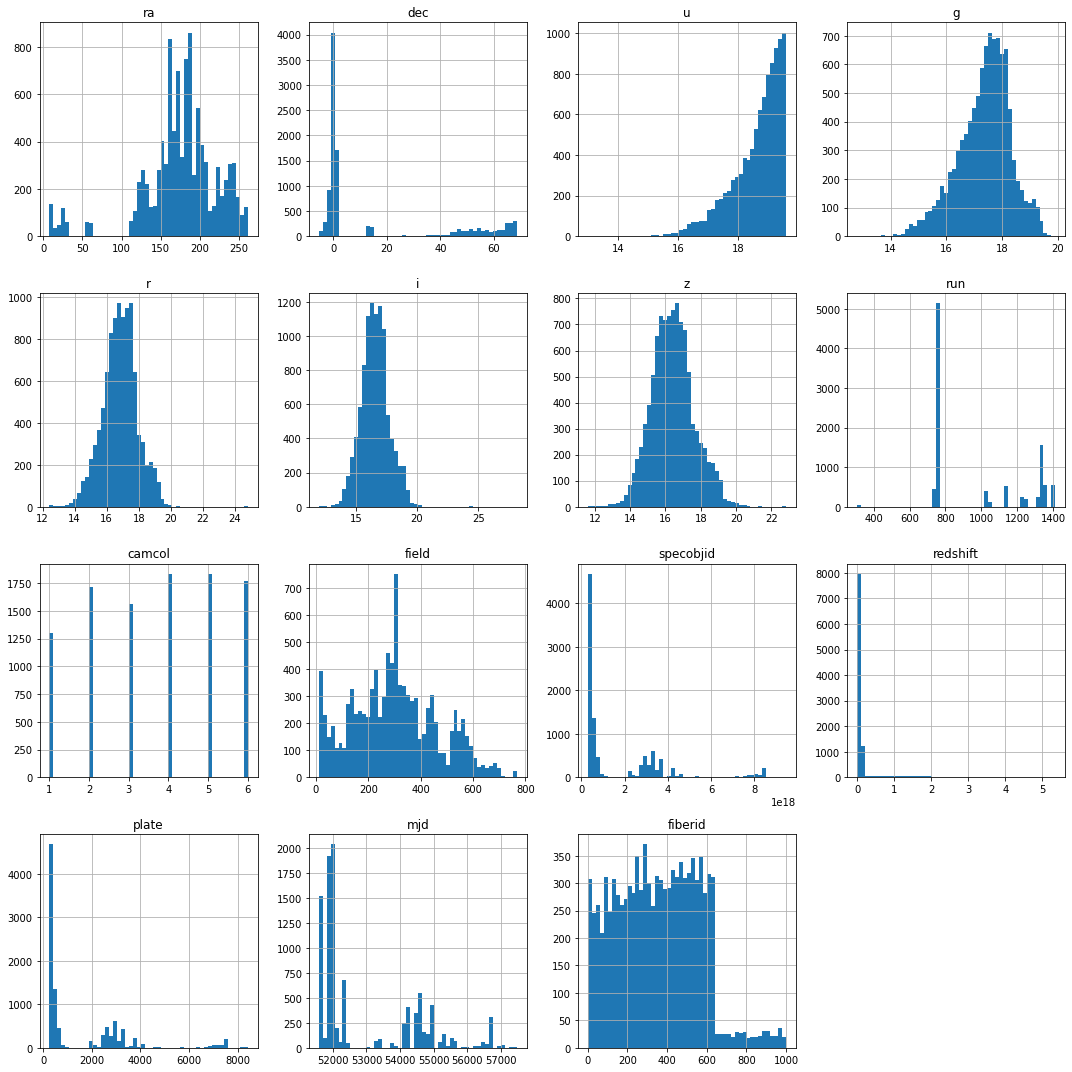

In [ ]:
df.hist(figsize=(15,15), bins=50)
plt.tight_layout()

Observations:
1. 'ra', 'u' and 'g' variables are left skewed. 
2. 'dec','specobjid','redshift','field','plate','mjd' and 'fiberid' variable is right skewed.
3. There are outliers in 'dec', 'u', 'r', 'i', 'ra', 'g', 'specobjid', 'plate','mjd' and 'field' variables.

#### class

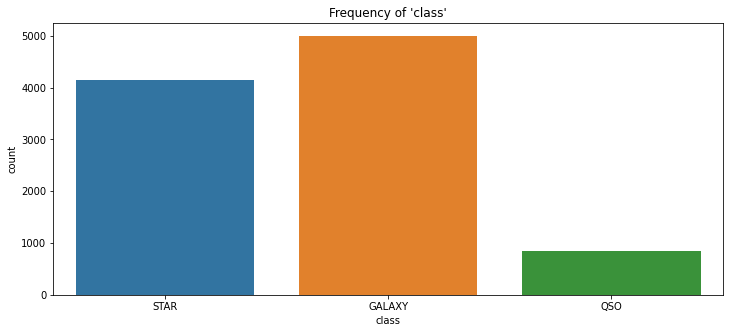

Value counts of 'class' variable: 
GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64



In [ ]:
countplot(df,'class')


Observations:
1. There are 3 categories in the 'class' variable - GALAXY, STAR, QSO.
2. GALAXY is the most frequent variable and QSO is the least frequent variable.
3. Even though QSO is only 8% of the total dataset this cannot be merged with another class to make this a balanced classification problem. We are dealing with an imbalanced classification problem.

#### camcol

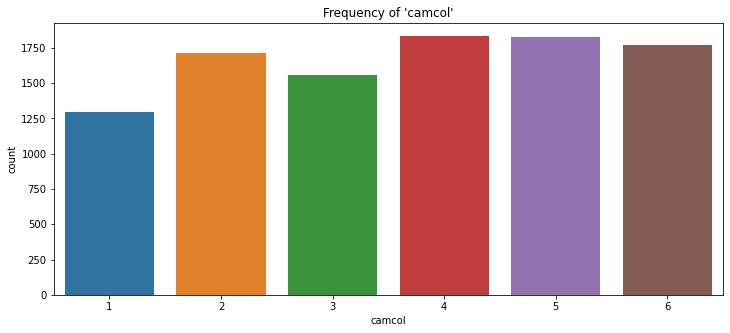

Value counts of 'camcol' variable: 
4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64



In [ ]:
countplot(df,'camcol')

Observations:
1. There are 6 categories in the 'camcol' variable.
2. All the categories are balanced.

#### run

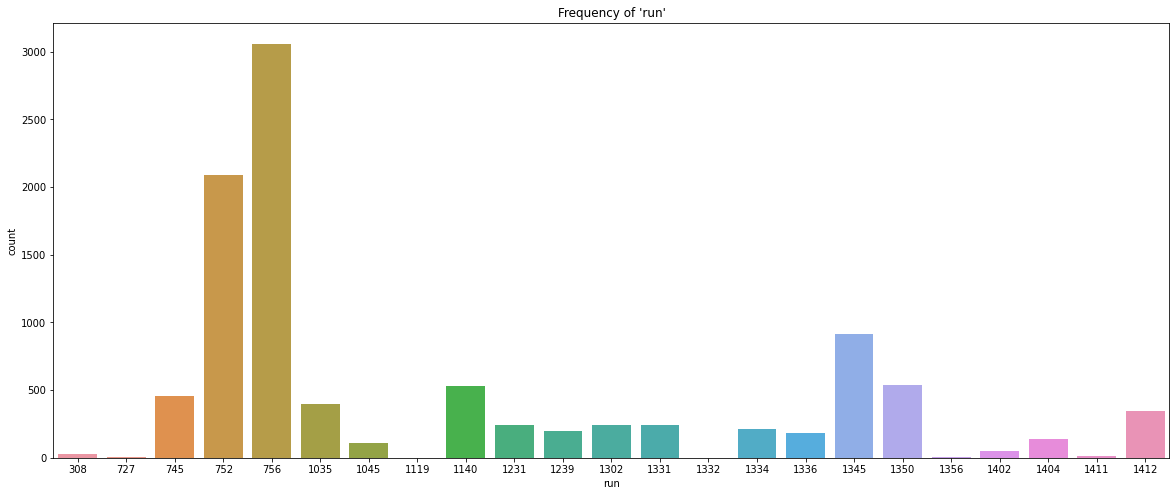

Value counts of 'run' variable: 
756     3060
752     2086
1345     915
1350     540
1140     527
745      453
1035     396
1412     347
1302     246
1331     245
1231     245
1334     212
1239     197
1336     182
1404     137
1045     112
1402      49
308       31
1411      10
1356       4
727        4
1119       1
1332       1
Name: run, dtype: int64



In [ ]:
countplot(df,'run')

Observations:
1. There are some values like 756 and 752 which have frequencies of 3060 and 2086 respectively. And there are some values like 1119 and 1332 which occur only once in the dataset.

### Multi Variate

In [ ]:
def show_distribution(data, col, func):
    if func == 'count':
        plt.figure(figsize=(15,7))
        plt.title(f"Frequency of {col}")
        sns.countplot(data[col], hue = data['class'])
        plt.show()
    elif func == 'dist':
        plt.figure(figsize=(15,5))        
        plt.title(f"Distribution on {col}")
        
        plt.axvline(np.mean(data[data['class']=='GALAXY'][col]), color='b', linestyle='--')
        plt.axvline(np.mean(data[data['class']=="STAR"][col]), color='y', linestyle='--')        
        plt.axvline(np.mean(data[data['class']=="QSO"][col]), color='g', linestyle='--')        
        
        sns.distplot(data[data['class']=='GALAXY'][col], hist=False, color='b',)
        sns.distplot(data[data['class']=="STAR"][col], hist=False, color='y')
        sns.distplot(data[data['class']=="QSO"][col], hist=False, color='g')

        plt.legend(['GALAXY','STAR','QSO'])
        plt.show()



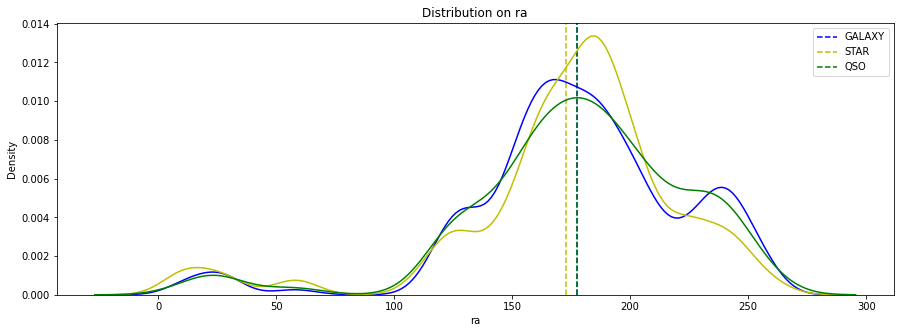

In [ ]:
show_distribution(df, 'ra','dist')

Observation:
1. The 'ra' variable does not clearly differentiate the classes. Can be dropped.

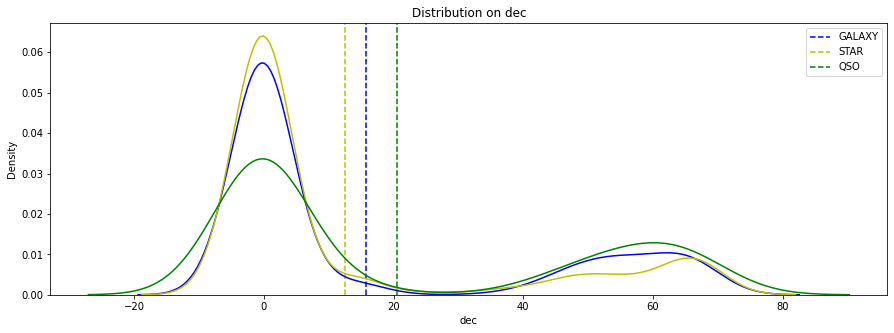

In [ ]:
show_distribution(df, 'dec','dist')

Observations:
1. dec is able to show the difference in the 3 categories of class variable.

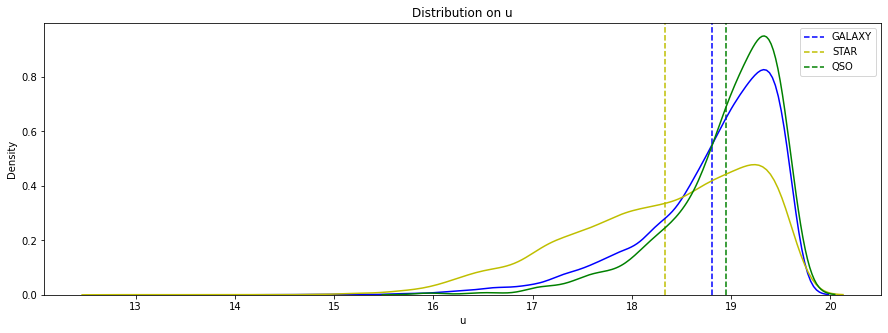

In [ ]:
show_distribution(df,'u','dist')

Observations:
1. There is a clear differnce in the distribution of STAR sample in 'u'

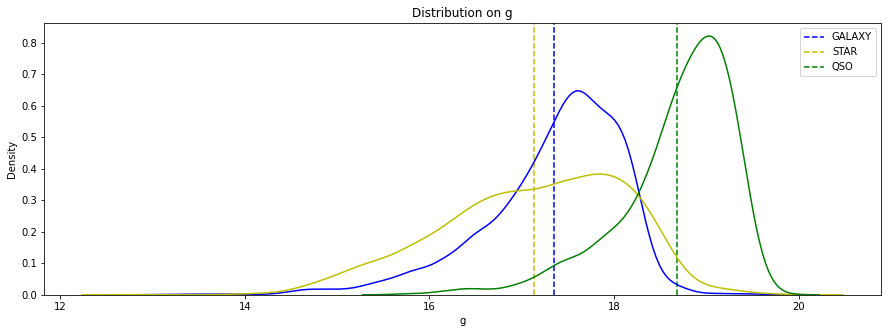

In [ ]:
show_distribution(df, 'g','dist')

Obsevations:
1. 'g' is able to distinguish the QSO samples.

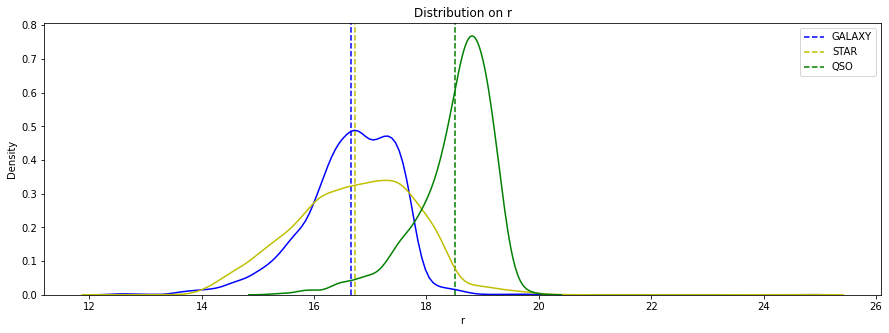

In [ ]:
show_distribution(df, 'r','dist')

Observaitons:
1. 'r' is able to distinguish the QSO samples clearly.

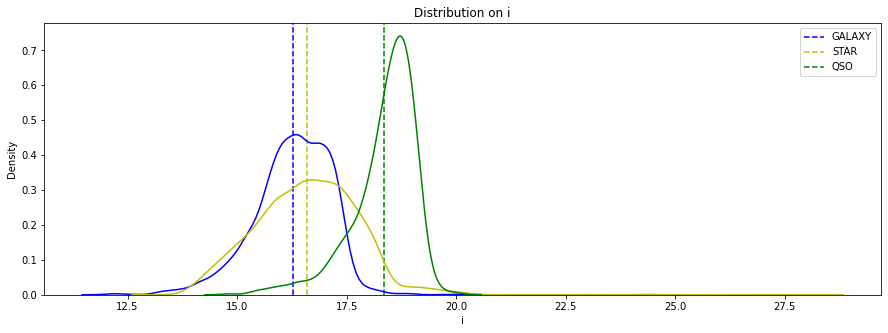

In [ ]:
show_distribution(df, 'i','dist')

Observations:
1. 'i' is able to show a clear distinction between (GALAXY/STAR) and QSO.

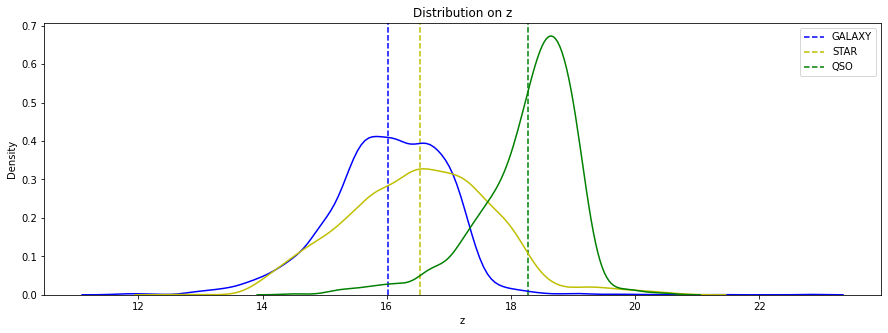

In [ ]:
show_distribution(df, 'z','dist')

Observations:
1. QSO sample is well distinguished. STAR and GALAXY are also considerable distinguished.

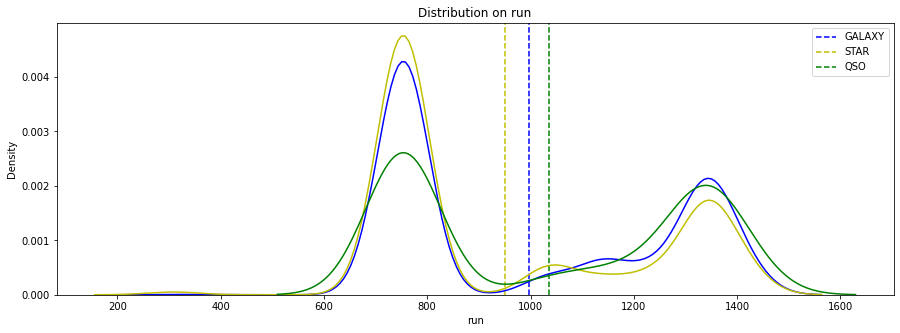

In [ ]:
show_distribution(df, 'run','dist')

Observations:
1. We can see some distinctions between the 3 classes.

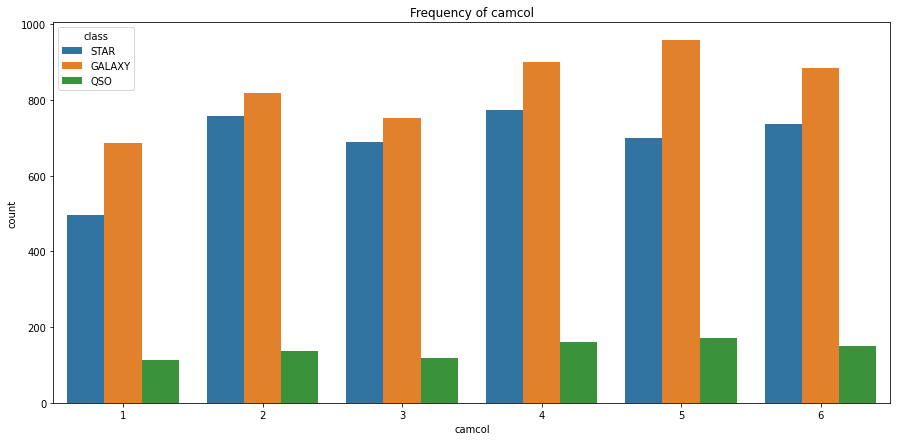

In [ ]:
show_distribution(df, 'camcol','count')

Observations:
1. The number of QSO sample is pretty low compared to STAR and GALAXY samples.

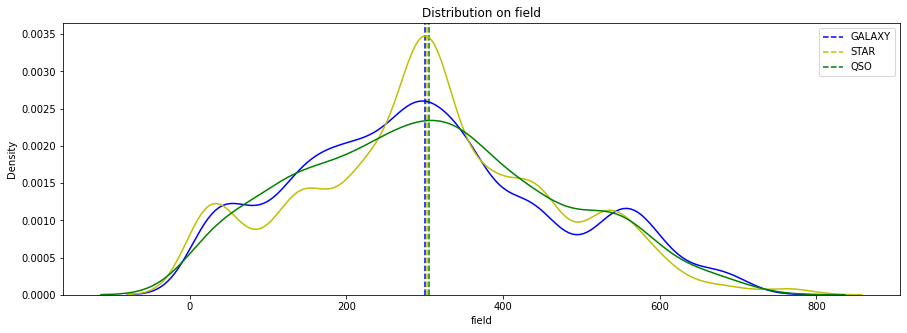

In [ ]:
show_distribution(df, 'field','dist')

Observations:
1. It is not able to show a clear distinction between the classes. So we can drop it.

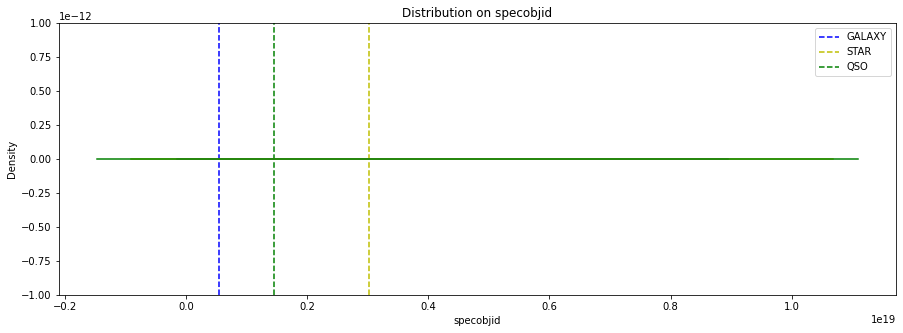

In [ ]:
show_distribution(df, 'specobjid','dist')

Observations:
1. Shows clear distinction between the three classes.

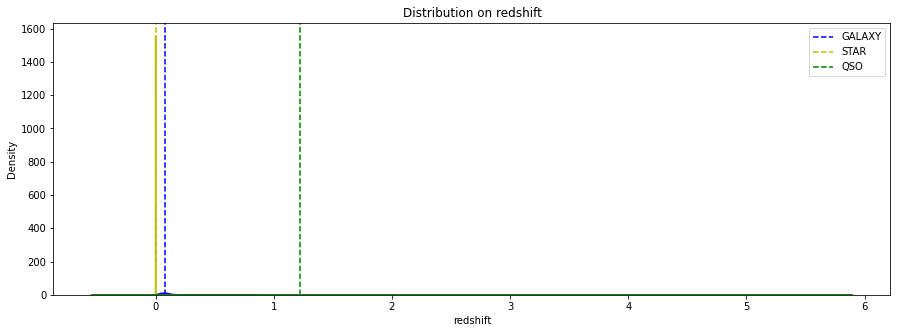

In [ ]:
show_distribution(df, 'redshift','dist')

Observations:
1. Shows clear distinction between the GALAXY/STAR and QSO classes.

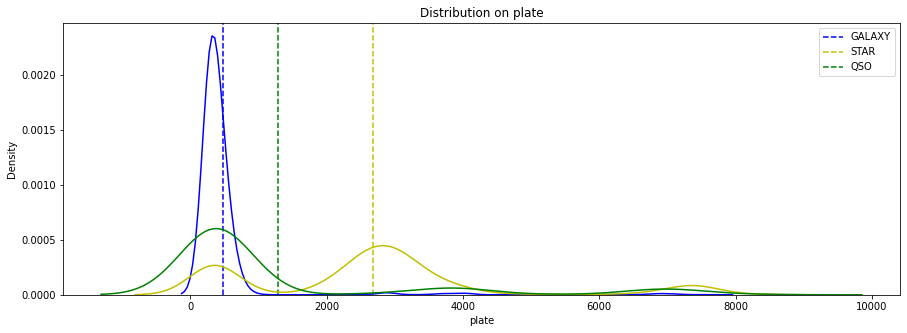

In [ ]:
show_distribution(df, 'plate','dist')

Observations:
1. Shows clear distinction between the three classes.

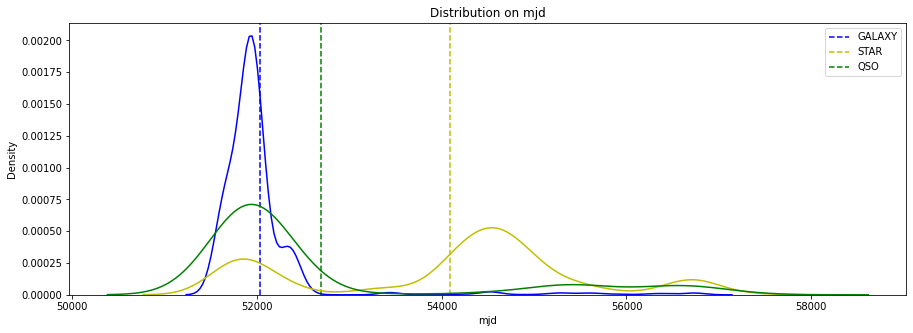

In [ ]:
show_distribution(df, 'mjd','dist')

Observations:
1. Shows clear distinction between the three classes.

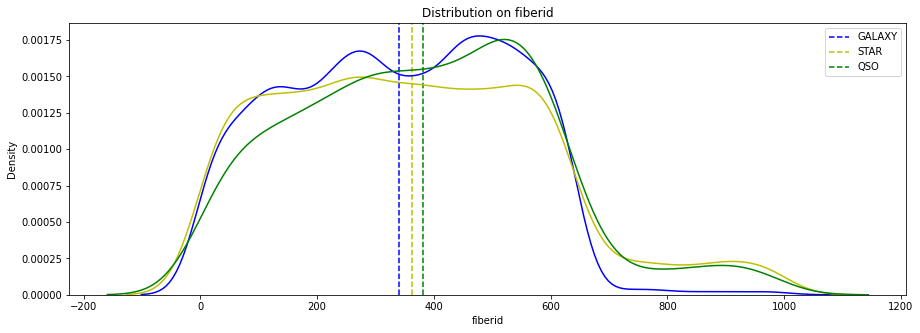

In [ ]:
show_distribution(df, 'fiberid','dist')

Observations:
1. Shows some distinction between the three classes.

In [ ]:
def show_multivar_dist(data, feature_list, target, share_axis_scale = False, hist = False, kde = True):
  plt.figure(figsize=(20,8))
  plt.suptitle(f'Multivariate distribution plot for "{target}" variable')
  j = 1
  axs = plt.subplot(1,3,3)
  for i in data[target].unique():
    if share_axis_scale:
      plt.subplot(1,3,j,sharex=axs,sharey=axs)
    else:
      plt.subplot(1,3,j)
    
    for col in feature_list:      
      sns.distplot(data[data[target]==i][col], hist=hist, kde=kde)
    
    plt.xlabel(i)
    plt.legend(feature_list)
    j+=1


#### Data from View "PhotoObj"

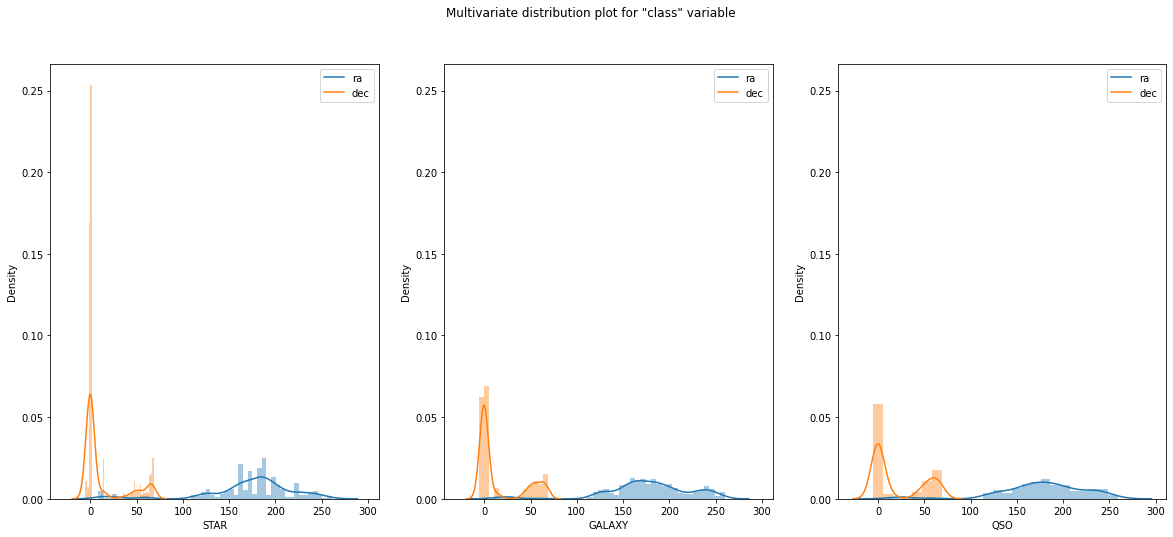

In [ ]:
show_multivar_dist(df, ['ra','dec'], 'class',True, hist=True)

Observations:
1. Not much difference in 'ra' for the classes GALAXY and QSO. Even for STAR the distribution is not much.
2. There is difference in 'dec' among the 3 classes.
2. Not much difference amoung the 3 classes in the combined view of 'ra' and 'dec for the three classes.

#### Bands of Telescope

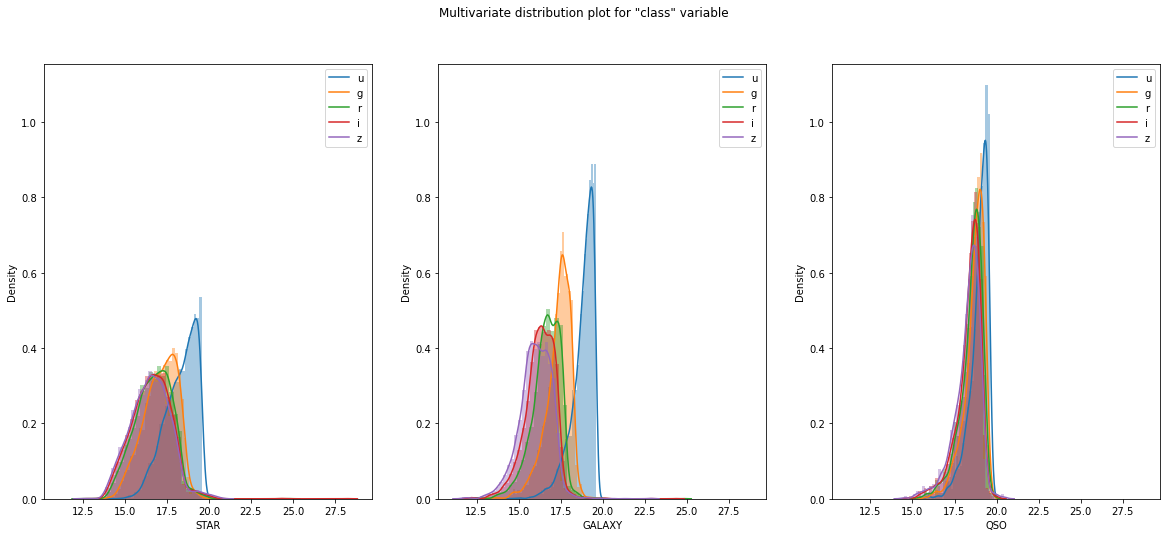

In [ ]:
show_multivar_dist(df, ['u','g','r','i','z'], 'class', True, hist=True)

Observations:
1. We can see that the combination of telescopic variables are able to show clear distinction between the three classes.

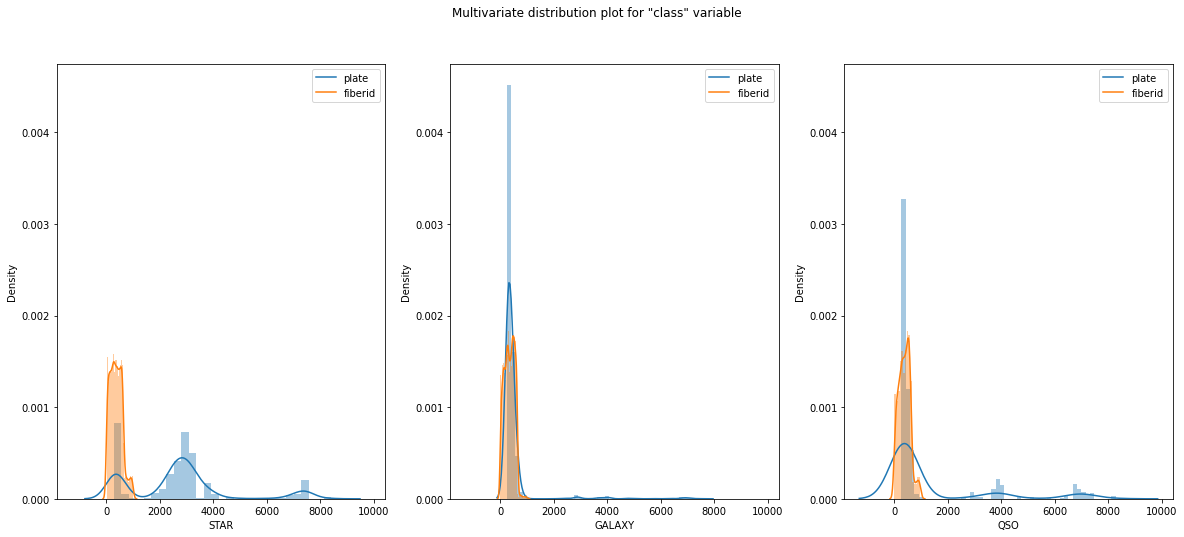

In [ ]:
show_multivar_dist(df, ['plate','fiberid'], 'class', True, hist=True)

Observations:
1. Plate and fiberid combination also shows some distinction between the three classes.

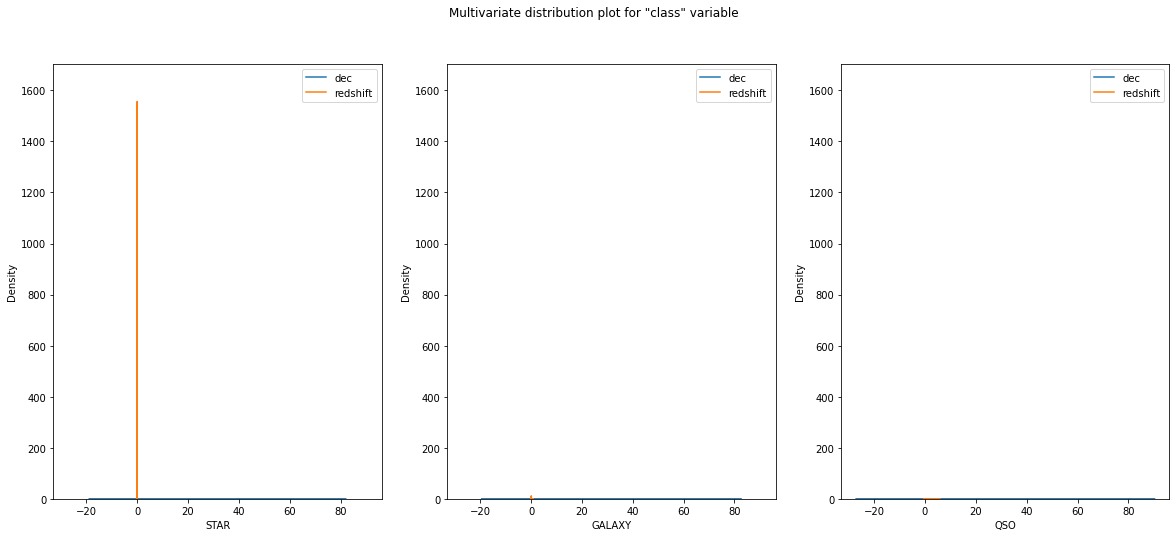

In [ ]:
show_multivar_dist(df, ['dec','redshift'], 'class', True, hist=True)

Observations:
1. We can see some distinction, however this requires scaling.

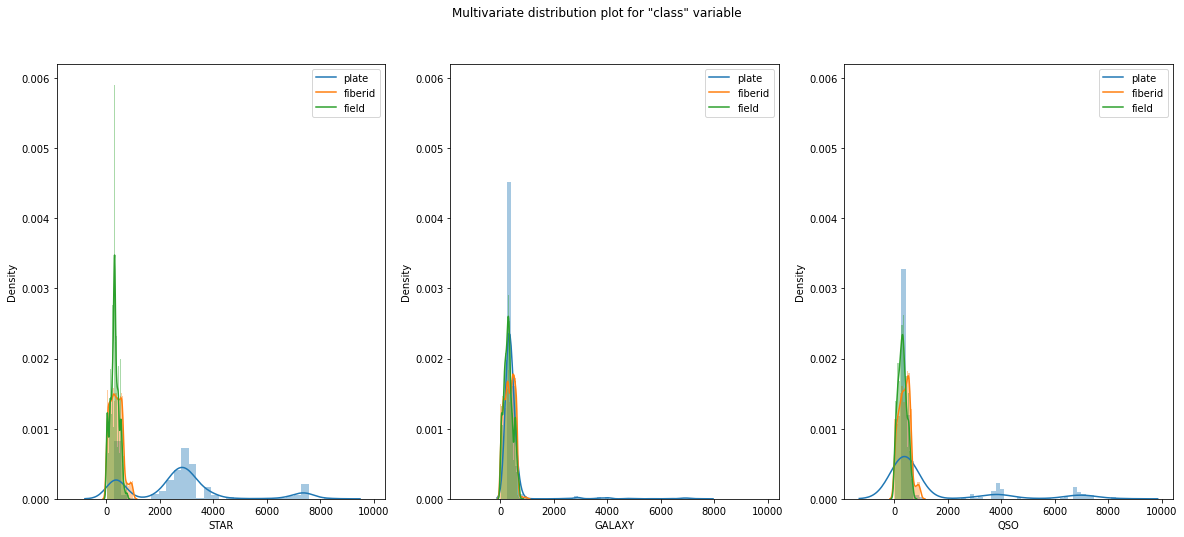

In [ ]:
show_multivar_dist(df, ['plate','fiberid','field'], 'class', True, hist=True)

Observations:
1. Shows some distinction between the three classes.

In [ ]:
df_new = df.copy()

### Encoding the target variable

In [ ]:
df['class']=df['class'].map({'GALAXY': 0, 'STAR':1,'QSO':2})
df.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,1,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,1,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,1,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,1,0.000590,3306,54922,512


Note:
1. The class 'GALAXY' is encoded as 0.
2. The class 'STAR' is encoded as 1.
3. The class 'QSO' is encoded as 2.

#### OUTLIER

In [ ]:
z_df = np.abs(zscore(df))

In [ ]:
threshold = 3
df_no_outlier = df[(z_df<threshold).all(axis=1)]

In [ ]:
df_no_outlier.shape

(8698, 16)

In [ ]:
print(f"{round((df.shape[0]-df_no_outlier.shape[0])/df.shape[0]*100)}% records contain outliers.")

13% records contain outliers.


In [ ]:
df_no_outlier.reset_index(inplace=True)
df_no_outlier.drop(['index'],axis=1,inplace=True)
df_no_outlier.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,1,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,1,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,1,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,1,0.000590,3306,54922,512


#### Separating features and target.

In [ ]:
df_no_outlier.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,1,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,1,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,1,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,1,0.000590,3306,54922,512


In [ ]:
drp =['ra', 'field','class']
#drp =['class','ra']
x = df_no_outlier.drop(drp, axis = 1)
y = df_no_outlier['class']

#### Data Transformation

ra, dec — right ascension and declination respectively

u, g, r, i, z — filter bands (a.k.a. photometric system or astronomical magnitudes)

run, rerun, camcol, field — descriptors of fields (i.e. 2048 x 1489 pixels) within image

redshift — increase in wavelength due to motion of astronomical object

plate — plate number

mjd — modified Julian date of observation

fiberid — optic fiber ID

In [ ]:
df_no_outlier.nunique()

ra           8698
dec          8698
u            8488
g            8542
r            8579
i            8602
z            8618
run            22
camcol          6
field         701
specobjid    5583
class           3
redshift     8420
plate         392
mjd           284
fiberid       756
dtype: int64

### Data Transformation

In [ ]:
df_no_outlier.skew()

ra          -0.130951
dec          1.212911
u           -0.981103
g           -0.528033
r           -0.153454
i            0.055966
z            0.167256
run          0.518602
camcol      -0.141193
field        0.220032
specobjid    1.320102
class        0.707083
redshift     4.951700
plate        1.320088
mjd          0.963989
fiberid      0.065374
dtype: float64

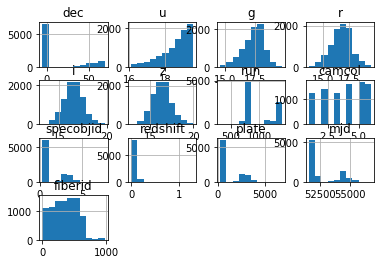

In [ ]:
x.hist()
plt.show()

Observations:
1. Since specobjid, plate, mjd are kind of identifiers and discrete, these wont be included in the transformation.

In [ ]:
x_t = x.copy()
pt = PowerTransformer(standardize=False)
x_t.head()

,dec,u,g,r,i,z,run,camcol,specobjid,redshift,plate,mjd,fiberid
0,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,3.722360e+18,-0.000009,3306,54922,491
1,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,3.638140e+17,-0.000055,323,51615,541
2,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,3.232740e+17,0.123111,287,52023,513
3,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,3.722370e+18,-0.000111,3306,54922,510
4,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,3.722370e+18,0.000590,3306,54922,512


In [ ]:
# removed 'specobjid','plate','mjd' from being transformed because after transformation all values became same to produce skewness of 0
x_t[['dec','redshift','u']] = pt.fit_transform(x[['dec','redshift','u']])
x_t.skew()

dec         -0.548404
u           -0.210400
g           -0.528033
r           -0.153454
i            0.055966
z            0.167256
run          0.518602
camcol      -0.141193
specobjid    1.320102
redshift     0.446980
plate        1.320088
mjd          0.963989
fiberid      0.065374
dtype: float64

In [ ]:
x_t.head()

,dec,u,g,r,i,z,run,camcol,specobjid,redshift,plate,mjd,fiberid
0,0.086495,1.103038e+16,17.04240,15.94699,15.50342,15.22531,752,4,3.722360e+18,-0.000009,3306,54922,491
1,0.128193,6.498379e+15,17.21449,16.67637,16.48922,16.39150,752,4,3.638140e+17,-0.000055,323,51615,541
2,0.119984,1.040521e+16,18.19169,17.47428,17.08732,16.80125,752,4,3.232740e+17,0.073223,287,52023,513
3,0.048897,3.526100e+15,16.60272,16.16116,15.98233,15.90438,752,4,3.722370e+18,-0.000111,3306,54922,510
4,0.098406,3.032267e+15,16.26342,16.43869,16.55492,16.61326,752,4,3.722370e+18,0.000589,3306,54922,512


Note:
1. Used PowerTransformation for ['dec','redshift','u'] variables.
2. Since specobjid, plate, mjd are kind of identifiers and discrete, these wont be included in the transformation.

#### Data Scaling

MinMaxScaling

In [ ]:
mn = MinMaxScaler()
x_mn = mn.fit_transform(x_t)

Robust Scaler

In [ ]:
rs = RobustScaler()
x_rs = rs.fit_transform(x_t)

Standard Scaling

In [ ]:
sc = StandardScaler()
x_sc = sc.fit_transform(x_t)

#### Finding the Random State

Data without any Transformation/scaling

In [ ]:
for i in range(0,101):
  x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size = 0.3, random_state = i, stratify = y)
  model = LogisticRegression(class_weight='balanced')
  model.fit(x_tr, y_tr)
  y_tr_pred = model.predict(x_tr)
  y_ts_pred = model.predict(x_ts)
  if round(f1_score(y_tr, y_tr_pred, average = 'weighted')*100,2)== round(f1_score(y_ts, y_ts_pred, average = 'weighted')*100,2):
    print(f"random state: {i}, Train score: {f1_score(y_tr, y_tr_pred, average = 'micro')}, test score: {f1_score(y_ts, y_ts_pred, average = 'micro')}")
    break


random state: 0, Train score: 0.5486202365308804, test score: 0.5486590038314176


Transformed data

In [ ]:
r_state = 0
train_score = 0
test_score = 0

for i in range(0,101):
  x_tr, x_ts, y_tr, y_ts = train_test_split(x_t, y, test_size = 0.3, random_state = i, stratify = y)
  model = LogisticRegression(class_weight='balanced')
  model.fit(x_tr, y_tr)
  y_tr_pred = model.predict(x_tr)
  y_ts_pred = model.predict(x_ts)
  tr_score = f1_score(y_tr, y_tr_pred, average = 'weighted')
  ts_score = f1_score(y_ts, y_ts_pred, average = 'weighted')
  if ts_score > test_score:
    if round(tr_score,2) == round(ts_score,2):
      train_score = tr_score
      test_score = ts_score
      r_state = i

print(f"random state: {r_state}, Train score: {train_score}, test score: {test_score}")
print(f"Variance: {round(train_score - test_score,6)}")
    


random state: 0, Train score: 0.38871268349875704, test score: 0.3887578889097427
Variance: -4.5e-05


Transformed and MinMaxScaled Data

In [ ]:
r_state = 0
train_score = 0
test_score = 0

for i in range(0,101):
  x_tr, x_ts, y_tr, y_ts = train_test_split(x_mn, y, test_size = 0.3, random_state = i, stratify = y)
  model = LogisticRegression(class_weight='balanced')
  model.fit(x_tr, y_tr)
  y_tr_pred = model.predict(x_tr)
  y_ts_pred = model.predict(x_ts)
  tr_score = f1_score(y_tr, y_tr_pred, average = 'weighted')
  ts_score = f1_score(y_ts, y_ts_pred, average = 'weighted')
  if ts_score > test_score:
    if round(tr_score,2) == round(ts_score,2):
      train_score = tr_score
      test_score = ts_score
      r_state = i

print(f"random state: {r_state}, Train score: {train_score}, test score: {test_score}")
print(f"Variance: {round(train_score - test_score,3)}")
    


random state: 66, Train score: 0.9752820937412607, test score: 0.9813873599584644
Variance: -0.006


Transformed and RobustScaled Data

In [ ]:
r_state = 0
train_score = 0
test_score = 0

for i in range(0,101):
  x_tr, x_ts, y_tr, y_ts = train_test_split(x_rs, y, test_size = 0.3, random_state = i, stratify = y)
  model = LogisticRegression(class_weight='balanced')
  model.fit(x_tr, y_tr)
  y_tr_pred = model.predict(x_tr)
  y_ts_pred = model.predict(x_ts)
  tr_score = f1_score(y_tr, y_tr_pred, average = 'weighted')
  ts_score = f1_score(y_ts, y_ts_pred, average = 'weighted')
  if ts_score > test_score:
    if round(tr_score,2) == round(ts_score,2):
      train_score = tr_score
      test_score = ts_score
      r_state = i

print(f"random state: {r_state}, Train score: {train_score}, test score: {test_score}")
print(f"Variance: {round(train_score - test_score,3)}")


random state: 94, Train score: 0.9760123679643165, test score: 0.982537614483395
Variance: -0.007


Transformed and StandardScaled Data

In [ ]:
r_state = 0
train_score = 0
test_score = 0

for i in range(0,101):
  x_tr, x_ts, y_tr, y_ts = train_test_split(x_sc, y, test_size = 0.3, random_state = i, stratify = y)
  model = LogisticRegression(class_weight='balanced')
  model.fit(x_tr, y_tr)
  y_tr_pred = model.predict(x_tr)
  y_ts_pred = model.predict(x_ts)
  tr_score = f1_score(y_tr, y_tr_pred, average = 'weighted')
  ts_score = f1_score(y_ts, y_ts_pred, average = 'weighted')
  if ts_score > test_score:
    if round(tr_score,2) == round(ts_score,2):
      train_score = tr_score
      test_score = ts_score
      r_state = i

print(f"random state: {r_state}, Train score: {train_score}, test score: {test_score}")
print(f"Variance: {round(train_score - test_score,3)}")


random state: 94, Train score: 0.9766040290367035, test score: 0.9836982453528099
Variance: -0.007


Observations:
1. The MinMaxScaler with PowerTransformer is giving us a better result with low bias and low variance.

### Correlation

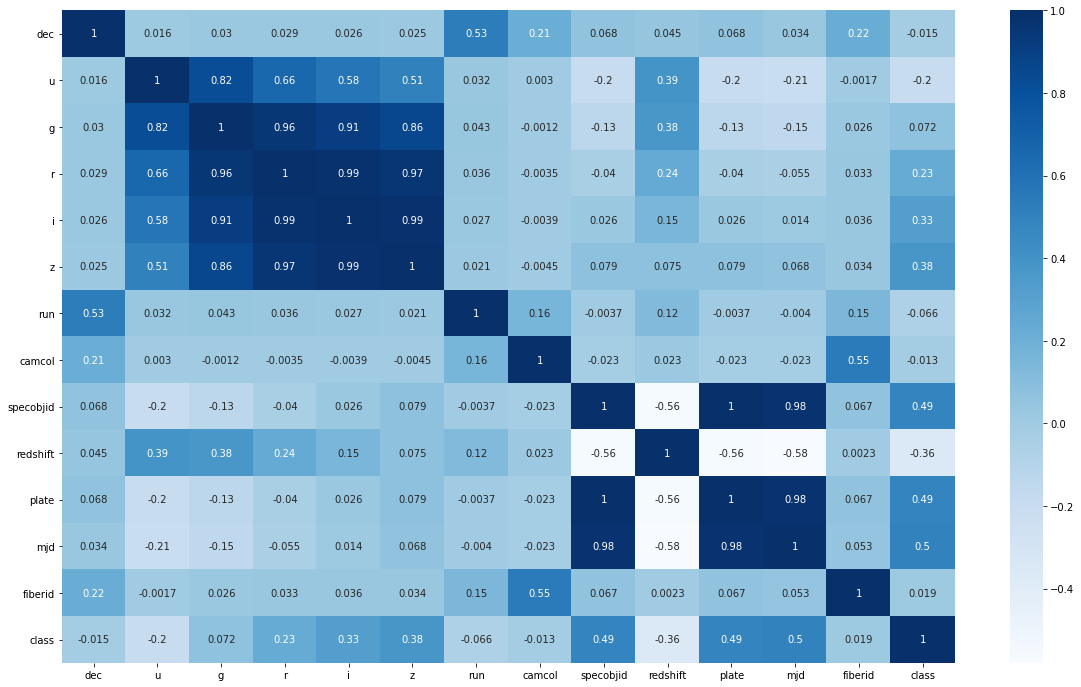

In [ ]:
plt.figure(figsize=(20,12))
corr = pd.concat([pd.DataFrame(x_mn, columns=df_no_outlier.drop(drp,axis=1).columns.values),pd.DataFrame(y,columns=['class'])], axis=1).corr()
sns.heatmap(corr,cmap='Blues', annot=True)

Observations:
1. specobjid, plate, mjd have almost +0.5 correlation. The rest of the correlation is spread across the other variables.
2. redshift has a negative correlation with 'class'.
3. There is multicollinearity in the data amoung the variables, however, since the correlation is spread across, I am not removing any variable.

### Splitting the data into train and test set.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_mn, y, test_size=0.30, random_state = 66, stratify = y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6088, 13), (2610, 13), (6088,), (2610,))

### Model Selection

In [ ]:
models = [LogisticRegression(class_weight='balanced'), SVC(class_weight='balanced'), GaussianNB(), DecisionTreeClassifier(class_weight='balanced'), KNeighborsClassifier(weights='distance')]

for model in models:

  cv_model = cross_val_score(model, x_train, y_train, scoring = 'f1_micro', cv=10, n_jobs= -1)
  
  print(f"Model: {model.__class__.__name__}")
  print(f"Cross val score: {cv_model}")
  print(f"Mean Cross val score: {cv_model.mean()}")
  print(f"Variance: {cv_model.var()}")
  print("="*50)


Model: LogisticRegression
Cross val score: [0.96223317 0.97701149 0.96551724 0.96551724 0.9819376  0.98522167
 0.97208539 0.97536946 0.98190789 0.97203947]
Mean Cross val score: 0.9738840636072942
Variance: 5.5215852943971954e-05
Model: SVC
Cross val score: [0.96880131 0.98522167 0.97701149 0.97372742 0.99014778 0.99178982
 0.97865353 0.98522167 0.98355263 0.98190789]
Mean Cross val score: 0.9816035238959469
Variance: 4.625574456937948e-05
Model: GaussianNB
Cross val score: [0.97536946 0.97372742 0.96387521 0.97044335 0.97536946 0.99014778
 0.97208539 0.96387521 0.97697368 0.96710526]
Mean Cross val score: 0.972897221502031
Variance: 5.3013346905736676e-05
Model: DecisionTreeClassifier
Cross val score: [0.97701149 0.98357964 0.97701149 0.98522167 0.98357964 0.99014778
 0.98850575 0.97865353 0.98026316 0.98026316]
Mean Cross val score: 0.9824237317431509
Variance: 1.8928781697537848e-05
Model: KNeighborsClassifier
Cross val score: [0.96551724 0.97536946 0.97372742 0.97044335 0.97536946 

Observations:
1. The SVC model gives the best cross val score followed by the DecisionTreeClassifier model.
2. DecisionTreeClassifier is showing lower variance than SVC model.

### Ensemble Techniques

In [ ]:
models = [SVC(class_weight='balanced'),DecisionTreeClassifier(class_weight='balanced',random_state=0), KNeighborsClassifier(weights='distance'), RandomForestClassifier(class_weight='balanced',random_state=0), GradientBoostingClassifier(random_state=0), AdaBoostClassifier(n_estimators=100, random_state=0),XGBClassifier(objective='multi:softmax',random_state=0)]

for model in models:

  cv_model = cross_val_score(model, x_train, y_train, scoring = 'f1_micro', cv=10, n_jobs= -1)
  
  print(f"Model: {model.__class__.__name__} ||  Mean Cross val score: {cv_model.mean()} || Variance: {cv_model.var()}")
  print("="*50)


Model: SVC ||  Mean Cross val score: 0.9816035238959469 || Variance: 4.625574456937948e-05
Model: DecisionTreeClassifier ||  Mean Cross val score: 0.9819308508339815 || Variance: 1.945067187528437e-05
Model: KNeighborsClassifier ||  Mean Cross val score: 0.9750334888946505 || Variance: 2.847157760714402e-05
Model: RandomForestClassifier ||  Mean Cross val score: 0.9865315227724485 || Variance: 2.792574609034733e-05
Model: GradientBoostingClassifier ||  Mean Cross val score: 0.9875175546625184 || Variance: 2.921124535697452e-05
Model: AdaBoostClassifier ||  Mean Cross val score: 0.8204187732261689 || Variance: 0.02036233531592837
Model: XGBClassifier ||  Mean Cross val score: 0.9896524716964826 || Variance: 2.15874982558188e-05


Observations:
1. XG Boost is giving a better cross val score of 98.97% followed by GradientBoosting model with a cross val score of 98.75%.
2. DecisionTreeClassifier gives the lowest variance of 1.945067187528437e-05 and also has a pretty decent score of 98.19%.
3. I am going to pick XGBClassifier and DecisionTreeClassifier for Hyperparameter tunning.

### HyperParameter Tunning

#### Tuning XGBClassifier

In [ ]:
booster = ['gbtree','dart']
learning_rate = [0.01,0.5,0.1,1]
max_depth   = [int(x) for x in np.linspace(0,110,3)]
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 3)]

params = {'booster':booster,
          'learning_rate':learning_rate,
          'max_depth': max_depth,
          'n_estimators': n_estimators}



xgb_model = XGBClassifier(objective='multi:softmax', random_state=0)

xgb_randomcv = RandomizedSearchCV(xgb_model, param_distributions=params, scoring = 'f1_micro', cv = 10, random_state=0, verbose=10, n_jobs=-1, n_iter=10)
xgb_randomcv.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 53.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 66.2min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='multi:softmax',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='dep

In [ ]:
print(xgb_randomcv.best_score_)
print(xgb_randomcv.best_params_)

0.9896522016247516
{'n_estimators': 550, 'max_depth': 55, 'learning_rate': 0.1, 'booster': 'gbtree'}


#### Tuning DecisionTreeClassifier

In [ ]:
criterion = ['gini','entropy']
splitter = ['best','random']
max_depth   = [int(x) for x in np.linspace(10,110,11)]
max_features = ['auto', 'log2', None]


params = {'criterion':criterion,
          'splitter' : splitter,
          'max_depth': max_depth,
          'max_features': max_features}



dtc_model = DecisionTreeClassifier(class_weight='balanced')

dtc_randomcv = RandomizedSearchCV(dtc_model, param_distributions=params, scoring = 'f1_micro', cv = 10, random_state=0, verbose=10, n_jobs=-1, n_iter = 10)
dtc_randomcv.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0396s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0413s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1873s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  87 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.7s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
   

In [ ]:
print(dtc_randomcv.best_score_)
print(dtc_randomcv.best_params_)

0.9839021043989284
{'splitter': 'best', 'max_features': None, 'max_depth': 60, 'criterion': 'entropy'}


Observations:
1. XGB is performing really well..

### Final Model

In [ ]:
xgbc_model = XGBClassifier(splitter = 'best', max_features = None, max_depth = 60, criterion = 'entropy')
xgbc_model.fit(x_train, y_train)
y_train_preds = xgbc_model.predict(x_train)
y_preds = xgbc_model.predict(x_test)

y_train_preds_probas = xgbc_model.predict_proba(x_train)
y_preds_probas = xgbc_model.predict_proba(x_test)

In [ ]:
xgbc_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='entropy',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=60,
              max_features=None, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              splitter='best', subsample=1, verbosity=1)

In [ ]:
print("Train Scores: ")
print(f"F1 score: {f1_score(y_train, y_train_preds, average = 'micro')}")
print(f"Roc AUC score: {roc_auc_score(y_train, y_train_preds_probas, multi_class='ovo')}")  #ovo due to class imbalance
print(f"Confusion Matrix: \n{confusion_matrix(y_train, y_train_preds)}")
print(f"Classification Report: \n{classification_report(y_train, y_train_preds)}")
print("="*50+"\n")
print("Test Scores: ")
print(f"F1 score: {f1_score(y_test, y_preds, average = 'micro')}")
print(f"Roc AUC score: {roc_auc_score(y_test, y_preds_probas, multi_class='ovo')}")         #ovo due to class imbalance
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_preds,)}")
print(f"Classification Report: \n{classification_report(y_test, y_preds,)}")

Train Scores: 
F1 score: 0.9998357424441524
Roc AUC score: 1.0
Confusion Matrix: 
[[3340    0    0]
 [   0 2460    0]
 [   0    1  287]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00      2460
           2       1.00      1.00      1.00       288

    accuracy                           1.00      6088
   macro avg       1.00      1.00      1.00      6088
weighted avg       1.00      1.00      1.00      6088


Test Scores: 
F1 score: 0.9923371647509579
Roc AUC score: 0.9897273205413697
Confusion Matrix: 
[[1427    1    4]
 [   0 1054    0]
 [  15    0  109]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1432
           1       1.00      1.00      1.00      1054
           2       0.96      0.88      0.92       124

    accuracy                           0.99      2610
   macro a

Observations:
1. The model is giving very good results in F1 score(micro, weighted and macro) as well as Roc AUC score in both training and test.
2. The model is a little behind at predicting 'QSO'. It will do better if there are more samples for 'QSO' as well.

In [ ]:
model = XGBClassifier(splitter = 'best', max_features = None, max_depth = 60, criterion = 'entropy')

cv_model = cross_val_score(model, x_train, y_train, scoring = 'f1_weighted', cv=10, n_jobs= -1)
  
print(f"Model: {model.__class__.__name__} ||  Mean Cross val score: {cv_model.mean()} || Variance: {cv_model.var()}")
  


Model: XGBClassifier ||  Mean Cross val score: 0.9887938071516678 || Variance: 2.578502817026534e-05


Observations:
1. The Cross val score is pretty good. The model has low bias and low variance.

### Saving the model

In [ ]:
#joblib.dump(model, './models/Space_server_model.obj')  #local system
joblib.dump(model, '/content/Space_server_model.obj')   # for google colab

['/content/Space_server_model.obj']

### Saving predictions

In [ ]:
predictions = pd.DataFrame(y_preds, columns=['Predictions'])['Predictions'].map({0:'GALAXY', 1:'STAR',2:'QSO'})

In [ ]:
predictions.head()

0    GALAXY
1    GALAXY
2      STAR
3    GALAXY
4    GALAXY
Name: Predictions, dtype: object

In [ ]:
#predictions.to_csv('./data/space_server_predictions.csv', sep=',')   #local system
predictions.to_csv('/content/space_server_predictions.csv', sep=',')   #colab